In [1]:
#pip install plotly

In [2]:
#pip install folium

In [3]:
#pip install geopandas

In [22]:
#pip install streamlit

In [2]:
import folium as fo
from folium import Choropleth
from folium.plugins import HeatMap
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
airports = pd.read_csv('Sample_data')
airports = airports[:50]

In [4]:
aircrafts = pd.read_csv('aircraft_ranges.csv')

In [4]:
aircrafts

,Aircraft,Type,Max Range
0,Boeing 787,Passenger Jet,7635
1,Airbus A330,Passenger Jet,6350
2,Dorier 228,Multi Prop,913
3,Bae Jetstream 3,Multi Prop,680
4,Aviocar,Multi Prop,519
5,Beechcraft 1900,Multi Prop,382
6,Cessna 172,Single Prop,696
7,Blackhawk,Rotary,1200
8,Eurocopter,Rotary,395
9,Bell 47,Rotary,258


In [15]:
list(aircrafts['Aircraft'][aircrafts['Type'] == 'Passenger Jet'].values)

['Boeing 787', 'Airbus A330']

In [30]:
aircrafts['Max Range'][aircrafts['Aircraft'] == 'Dorier 228'].values[0]

913

In [5]:
airports.head()
#len(airports)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,4342,LIMF,large_airport,Turin Airport,45.200802,7.649630,989.0,EU,IT,IT-21,Torino,yes,LIMF,TRN,TO11,http://www.aeroportoditorino.it/,https://en.wikipedia.org/wiki/Turin_Internatio...,"Torino-Caselle Airport, Sandro Pertini Airport..."
1,2596,ENSR,medium_airport,Sørkjosen Airport,69.786797,20.959400,16.0,EU,NO,NO-54,Sørkjosen,yes,ENSR,SOJ,NaN,https://avinor.no/en/airport/sorkjosen-airport/,https://en.wikipedia.org/wiki/S%C3%B8rkjosen_A...,NaN
2,2476,EGSS,large_airport,London Stansted Airport,51.884998,0.235000,348.0,EU,GB,GB-ENG,London,yes,EGSS,STN,NaN,http://www.stanstedairport.com/,https://en.wikipedia.org/wiki/London_Stansted_...,LON
3,4010,LEGE,medium_airport,Girona-Costa Brava Airport,41.904639,2.761774,468.0,EU,ES,ES-CT,Girona,yes,LEGE,GRO,NaN,https://www.aena.es/en/girona-costa-brava.html,https://en.wikipedia.org/wiki/Girona-Costa_Bra...,"Girona,Costa Brava,Girona-Costa Brava"
4,4483,LRSB,medium_airport,Sibiu International Airport,45.785599,24.091299,1496.0,EU,RO,RO-SB,Sibiu,yes,LRSB,SBZ,NaN,http://www.sibiuairport.ro/,https://en.wikipedia.org/wiki/Sibiu_Internatio...,NaN


In [6]:
# Making the table with aircrafts assigned to airports:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(0,2, size=(len(airports['gps_code'].unique()), len(aircrafts))), 
                  columns = aircrafts['Aircraft'], index = airports['gps_code'].unique())

In [7]:
df.head()
#len(df)

Aircraft,Boeing 787,Airbus A330,Dorier 228,Bae Jetstream 3,Aviocar,Beechcraft 1900,Cessna 172,Blackhawk,Eurocopter,Bell 47,Robinson R22,ChineseWeather
LIMF,0,1,0,0,0,1,0,0,0,1,0,0
ENSR,0,0,1,0,1,1,1,0,1,0,1,1
EGSS,1,1,1,1,1,1,0,0,1,1,1,0
LEGE,1,0,0,0,0,0,1,1,1,1,1,0
LRSB,1,1,0,1,0,1,0,1,1,0,0,0


In [14]:
# Selecting the aircraft that have a 1 for each airport:
x = df.apply(lambda row: row[row==1].index, axis=1)

In [7]:
df.index.name = 'gps_code'
df_joined = airports.join(df, on = 'gps_code', how = 'inner')
df_joined.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,...,Dorier 228,Bae Jetstream 3,Aviocar,Beechcraft 1900,Cessna 172,Blackhawk,Eurocopter,Bell 47,Robinson R22,ChineseWeather
0,4342,LIMF,large_airport,Turin Airport,45.200802,7.649630,989.0,EU,IT,IT-21,...,0,0,0,1,0,0,0,1,0,0
1,2596,ENSR,medium_airport,Sørkjosen Airport,69.786797,20.959400,16.0,EU,NO,NO-54,...,1,0,1,1,1,0,1,0,1,1
2,2476,EGSS,large_airport,London Stansted Airport,51.884998,0.235000,348.0,EU,GB,GB-ENG,...,1,1,1,1,0,0,1,1,1,0
3,4010,LEGE,medium_airport,Girona-Costa Brava Airport,41.904639,2.761774,468.0,EU,ES,ES-CT,...,0,0,0,0,1,1,1,1,1,0
4,4483,LRSB,medium_airport,Sibiu International Airport,45.785599,24.091299,1496.0,EU,RO,RO-SB,...,0,1,0,1,0,1,1,0,0,0


In [263]:
aircrafts

,Aircraft,Type,Max Range
0,Boeing 787,Passenger Jet,7635
1,Airbus A330,Passenger Jet,6350
2,Dorier 228,Multi Prop,913
3,Bae Jetstream 3,Multi Prop,680
4,Aviocar,Multi Prop,519
5,Beechcraft 1900,Multi Prop,382
6,Cessna 172,Single Prop,696
7,Blackhawk,Rotary,1200
8,Eurocopter,Rotary,395
9,Bell 47,Rotary,258


In [265]:
dict1 = pd.Series(aircrafts['Max Range'].values, index = aircrafts['Aircraft']).to_dict()
dict1

{'Boeing 787': 7635,
 'Airbus A330': 6350,
 'Dorier 228': 913,
 'Bae Jetstream 3': 680,
 'Aviocar': 519,
 'Beechcraft 1900': 382,
 'Cessna 172': 696,
 'Blackhawk': 1200,
 'Eurocopter': 395,
 'Bell 47': 258,
 'Robinson R22': 209,
 'ChineseWeather': 3596}

In [277]:
ex = ['Airbus A330', 'Dorier 228', 'Beechcraft 1900']
print(max([dict1[x] for x in ex]))

6350


In [15]:
max_ranges = []
max_planes = []
for i in range(len(x)):
    ranges = []
    for plane in x[i]:
        ranges.append(aircrafts['Max Range'][aircrafts['Aircraft'] == plane].values[0])
    max_range = max(ranges)
    max_ranges.append(max_range)
    max_plane = aircrafts['Aircraft'][aircrafts['Max Range'] == max_range].values[0]
    max_planes.append(max_plane)
airports["Max_Range"] = max_ranges
airports["Max_Plane"] = max_planes

In [16]:
min_ranges = []
min_planes = []
for i in range(len(x)):
    ranges = []
    for plane in x[i]:
        ranges.append(aircrafts['Max Range'][aircrafts['Aircraft'] == plane].values[0])
    min_range = min(ranges)
    min_ranges.append(min_range)
    min_plane = aircrafts['Aircraft'][aircrafts['Max Range'] == min_range].values[0]
    min_planes.append(min_plane)
airports["Min_Range"] = min_ranges
airports["Min_Plane"] = min_planes

In [9]:
#airports = airports.drop('Min_Range', axis=1)
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,4342,LIMF,large_airport,Turin Airport,45.200802,7.649630,989.0,EU,IT,IT-21,Torino,yes,LIMF,TRN,TO11,http://www.aeroportoditorino.it/,https://en.wikipedia.org/wiki/Turin_Internatio...,"Torino-Caselle Airport, Sandro Pertini Airport..."
1,2596,ENSR,medium_airport,Sørkjosen Airport,69.786797,20.959400,16.0,EU,NO,NO-54,Sørkjosen,yes,ENSR,SOJ,NaN,https://avinor.no/en/airport/sorkjosen-airport/,https://en.wikipedia.org/wiki/S%C3%B8rkjosen_A...,NaN
2,2476,EGSS,large_airport,London Stansted Airport,51.884998,0.235000,348.0,EU,GB,GB-ENG,London,yes,EGSS,STN,NaN,http://www.stanstedairport.com/,https://en.wikipedia.org/wiki/London_Stansted_...,LON
3,4010,LEGE,medium_airport,Girona-Costa Brava Airport,41.904639,2.761774,468.0,EU,ES,ES-CT,Girona,yes,LEGE,GRO,NaN,https://www.aena.es/en/girona-costa-brava.html,https://en.wikipedia.org/wiki/Girona-Costa_Bra...,"Girona,Costa Brava,Girona-Costa Brava"
4,4483,LRSB,medium_airport,Sibiu International Airport,45.785599,24.091299,1496.0,EU,RO,RO-SB,Sibiu,yes,LRSB,SBZ,NaN,http://www.sibiuairport.ro/,https://en.wikipedia.org/wiki/Sibiu_Internatio...,NaN


In [155]:
from pyproj import CRS, Transformer
from shapely.geometry import Point
from shapely.ops import transform
from folium.plugins import MousePosition
from shapely.geometry import Polygon

In [113]:
def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = CRS.from_proj4(
        f"+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0")
    tfmr = Transformer.from_proj(aeqd_proj, aeqd_proj.geodetic_crs)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(tfmr.transform, buf).exterior.coords[:]

In [298]:
geodesic_point_buffer(40, 20, 5)
geometry = gpd.points_from_xy(df_joined.longitude_deg, df_joined.latitude_deg)
geo = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")
geoseries = gpd.GeoSeries(geometry, crs="EPSG:4326").to_crs("EPSG:3034")

In [164]:
geo2 = geo.to_crs("EPSG:3857")

In [299]:

buffer_df = gpd.GeoDataFrame(geometry = geoseries.buffer(500000))

In [300]:
buffer_df.minimum_bounding_radius()

0     500000.0
1     500000.0
2     500000.0
3     500000.0
4     500000.0
5     500000.0
6     500000.0
7     500000.0
8     500000.0
9     500000.0
10    500000.0
11    500000.0
12    500000.0
13    500000.0
14    500000.0
15    500000.0
16    500000.0
17    500000.0
18    500000.0
19    500000.0
20    500000.0
21    500000.0
22    500000.0
23    500000.0
24    500000.0
25    500000.0
26    500000.0
27    500000.0
28    500000.0
29    500000.0
30    500000.0
31    500000.0
32    500000.0
33    500000.0
34    500000.0
35    500000.0
36    500000.0
37    500000.0
38    500000.0
39    500000.0
40    500000.0
41    500000.0
42    500000.0
43    500000.0
44    500000.0
45    500000.0
46    500000.0
47    500000.0
48    500000.0
49    500000.0
dtype: float64

In [255]:
geo2.iloc[0]['geometry'].buffer(5000).add_to(eu)

AttributeError: 'Polygon' object has no attribute 'add_to'

In [257]:
len(df_joined)

50

In [136]:
geo.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [233]:
eu = fo.Map(location=[50,10], zoom_start=3.5, crs ='EPSG3857',scrollWheelZoom=False)
MousePosition().add_to(eu)
#eu = gdf_grid.plot(figsize=(20,20), alpha=0.1, edgecolor='k')
for i in range(len(airports)):
    fo.CircleMarker(location=[airports.iloc[i]['latitude_deg'], airports.iloc[i]['longitude_deg']], popup=airports.iloc[i]['gps_code'], radius=2).add_to(eu)
    #geo_j = geo.iloc[i]["geometry"].buffer(airports.iloc[i]['Min_Range']/60)
    
    fo.GeoJson(buffer_df.iloc[i]['geometry'], name='geojson', tooltip = 'Hello').add_to(eu)
    #fo.Circle(location=[airports.iloc[i]['latitude_deg'], airports.iloc[i]['longitude_deg']], radius=float(((airports.iloc[i]['Min_Range']/2)*1852)), color='#3186cc', fill_color='#3186cc', fill_opacity=0.05).add_to(eu)


eu


In [220]:
from shapely.ops import unary_union

In [241]:
boundary = gpd.GeoSeries(unary_union(buffer_df['geometry']), crs="4326")

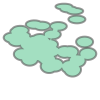

In [242]:
boundary[0]

In [307]:
eu2 = fo.Map([50,10], zoom_start=4, crs="EPSG3857")
#fo.GeoJson(geoseries, name='union').add_to(eu2)
fo.GeoJson(buffer_df).add_to(eu2)

eu2

In [244]:
boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [245]:
boundary2 = boundary.to_crs("EPSG:3857")

In [247]:
(boundary2.area)/(1000000)

0    1.753875e+07
dtype: float64

In [302]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

C:\Users\DS02\AppData\Local\Temp\ipykernel_15316\4025383553.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [303]:
italy = world.loc[world['name'] == 'Italy'] # get Singapore row
boundaries = italy['geometry']

In [314]:
fo.GeoJson(boundaries).add_to(eu3)

In [317]:
fo.GeoJson(boundaries2).add_to(eu3)

In [323]:
france = world.loc[world['name'] == 'France']
boundaries3 = france['geometry']

In [349]:
type(boundaries3)

geopandas.geoseries.GeoSeries

In [325]:
style = {'fillColor': '#228B22', 'color': '#228B22'}
fo.GeoJson(boundaries3, style_function=lambda x:style).add_to(eu3)
eu3

In [334]:
eastern_flank = ["Estonia", "Latvia", "Lithuania", "Poland", "Finland", "Slovakia", "Hungary", "Romania", "Bulgaria", "Turkey"]

In [335]:
flank = world.loc[world['name'].isin(eastern_flank)]

In [347]:
style2 = {'fillColor': '#FF8C00', 'color': '#FF8C00'}
for i in range(len(flank)):
    boundary= flank.iloc[i]['geometry']
    fo.GeoJson(boundary, style_function=lambda x:style2).add_to(eu3)

In [346]:
eu3 = fo.Map([50,10], zoom_start=4)

In [348]:
eu3